# Modules

In [ ]:
import pandas as pd
import numpy as np
import csv
import time
from tqdm import tqdm

!pip install trafilatura
from trafilatura.sitemaps import sitemap_search
from trafilatura import fetch_url, extract, bare_extraction

# For Preprocessing
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
!pip install langdetect emoji
from langdetect import detect
import emoji
!pip install gensim
import gensim.downloader as api
# Load pre-trained word vectors
word_vectors = api.load('glove-wiki-gigaword-100')
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 38.1 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=cf991b8d35090662ee23373e34d0c39889f382d37e457906793b2ff2927d7eb8
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
[=============-------------------------------------] 27.9% 35.7/128.1MB downloaded

# Data Collection

## Scraping Functions

In [77]:
def get_urls_from_sitemap(resource_url: str) -> list:
    """
    Funzione che crea un DataFrame Pandas di URL e articoli.
    Function to create a Pandas DataFrame from the article URL
    """
    urls = sitemap_search(resource_url)
    print(f'Urls: {urls}')
    return urls


def extract_article(url: str) -> dict:
    """
    Estrae un articolo da una URL con Trafilatura
    Extract an article from a URL from Trafiltura
    """
    downloaded = fetch_url(url)
    article = extract(downloaded, favor_precision=True)

    return article

def extract_date(url: str) -> dict:

    downloaded = fetch_url(url)
    date = bare_extraction(downloaded,favor_precision=True)['date']

    return date

def create_dataset(list_of_websites: list, df_original=None) -> pd.DataFrame:
    """
    Funzione che crea un DataFrame Pandas di URL e articoli.
    Function to create a Pandas Dataframe from an article URL
    """

    data = []
    for website in tqdm(list_of_websites, desc="Websites"):
        urls = get_urls_from_sitemap(website)
        for url in tqdm(urls, desc="URLs"):
            if df_original is None:
                if url in df_original['url'].tolist():
                    continue
            d = {
                'url': url,
                "article": extract_article(url),
                "date" : pd.to_datetime(extract_date(url))
            }
            data.append(d)
            time.sleep(0.5)

    df = pd.DataFrame(data)
    if df_original:
        # Append only rows from df2 that are not in df1
        df_original = pd.concat([df_original, df[~df.apply(tuple,1).isin(df_original.apply(tuple,1))]])
        df = df_original

    df = df.drop_duplicates()
    df = df.dropna()

    return df


## Dataset 1

In [78]:
list_of_websites = [
    "https://nation.africa/kenya",
    "https://www.standardmedia.co.ke/",
    "https://www.businessdailyafrica.com/",
    "https://www.pd.co.ke/",
    "https://www.citizen.digital/",
    "https://www.nationmedia.com/brands/daily-nation/",
    "https://www.the-star.co.ke/"
]

df = create_dataset(list_of_websites, df)

Websites:   0%|          | 0/7 [00:00<?, ?it/s]

Urls: ['https://nation.africa/kenya/business/kenya-targets-5-million-kilos-tea-export-to-china-annually-after-signing-deal-4627066', 'https://nation.africa/kenya/business/key-projects-face-delays-on-20pc-agriculture-budget-cut-4626726', 'https://nation.africa/kenya/business/seeds-of-gold/what-to-do-when-lumpy-skin-disease-hits-your-animals-4627040', 'https://nation.africa/kenya/counties/kajiado/governor-lenku-accused-of-taking-sides-in-sh100bn-communal-land-dispute-4626750', 'https://nation.africa/kenya/counties/kiambu/one-shot-dead-in-thika-as-kiambu-politicians-clash-over-sh55m-market--4626774', 'https://nation.africa/kenya/counties/kirinyaga/four-arrested-in-kirinyaga-while-ferrying-donkey-meat-to-nairobi--4626968', 'https://nation.africa/kenya/counties/marsabit/from-glittering-prophecy-to-curse-inside-marsabit-s-gold-mines-of-death-4626632', 'https://nation.africa/kenya/counties/meru/blood-relatives-man-linked-with-deaths-of-four-family-members--4626868', 'https://nation.africa/ken


Websites:  14%|█▍        | 1/7 [00:22<02:16, 22.77s/it]WARNING:trafilatura.sitemaps:not a valid XML sitemap: https://www.standardmedia.co.ke/sitemap_news.xml


Urls: []



URLs: 0it [00:00, ?it/s]
Websites:  29%|██▊       | 2/7 [00:42<01:46, 21.21s/it]

Urls: ['https://www.businessdailyafrica.com/bd/sponsored/how-partnering-with-a-global-bank-can-elevate-your-enterprise-4626310', 'https://www.businessdailyafrica.com/bd/sponsored/how-to-adapt-binary-options-trading-strategies-4626308', 'https://www.businessdailyafrica.com/bd/opinion-analysis/columnists/align-petroleum-electricity-infrastructure-with-energy-shift-4625554', 'https://www.businessdailyafrica.com/bd/opinion-analysis/columnists/county-industrial-hubs-to-unlock-manufacturing-potential-4625556', 'https://www.businessdailyafrica.com/bd/opinion-analysis/columnists/why-world-must-call-out-banga-hype-at-the-springs-4626246', 'https://www.businessdailyafrica.com/bd/corporate/companies/kcb-bank-taps-sh12-4bn-loan-for-lending-to-women-4626076', 'https://www.businessdailyafrica.com/bd/corporate/companies/women-outnumber-men-in-kcb-workforce-4625536', 'https://www.businessdailyafrica.com/bd/lifestyle/profiles/abdi-mohamed-lifelong-addiction-4625514', 'https://www.businessdailyafrica.co


Websites:  43%|████▎     | 3/7 [01:09<01:33, 23.48s/it]WARNING:trafilatura.sitemaps:base URL unreachable, dropping sitemap: https://www.pd.co.ke/


Urls: []



URLs: 0it [00:00, ?it/s]
Websites:  57%|█████▋    | 4/7 [01:09<00:42, 14.27s/it]ERROR:trafilatura.downloads:not a 200 response: 400 for URL https://www.citizen.digital/sitemap_news.xml
ERROR:trafilatura.downloads:not a 200 response: 400 for URL https://www.citizen.digital/sitemap_index.xml
ERROR:trafilatura.downloads:not a 200 response: 400 for URL https://www.citizen.digital/sitemap


Urls: ['https://www.citizen.digital/news/slovak-pm-shooting-positive-health-outlook-suspect-in-detention-n342367', 'https://www.citizen.digital/news/kws-evicts-hundreds-of-families-near-lake-kamnarok-n342371', 'https://www.citizen.digital/news/azimio-mps-vow-to-reject-finance-bill-2024-n342377', 'https://www.citizen.digital/news/police-launch-probe-after-one-person-killed-in-clash-between-supporters-of-kiambu-politicians-n342374', 'https://www.citizen.digital/news/ekuru-aukot-petitions-un-to-stop-deployment-of-kenya-police-to-haiti-n342379', 'https://www.citizen.digital/news/auditor-general-raises-concerns-over-ksh155b-ecitizen-revenue-statements-n342365', 'https://www.citizen.digital/news/president-ruto-i-was-elected-to-transform-the-country-not-to-be-re-elected-n342373', 'https://www.citizen.digital/sports/verstappen-matches-senna-pole-record-at-imola-n342378', 'https://www.citizen.digital/sports/leverkusen-become-first-team-to-complete-bundesliga-season-unbeaten-n342376', 'https://w


URLs:  50%|████▉     | 1013/2030 [1:34:26<1:17:13,  4.56s/it]ERROR:trafilatura.downloads:download error: https://www.citizen.digital/podcasts/podcasts-new HTTPSConnectionPool(host='www.citizen.digital', port=443): Max retries exceeded with url: /podcasts/podcasts-new (Caused by ResponseError('too many 500 error responses'))
ERROR:trafilatura.downloads:download error: https://www.citizen.digital/podcasts/podcasts-new HTTPSConnectionPool(host='www.citizen.digital', port=443): Max retries exceeded with url: /podcasts/podcasts-new (Caused by ResponseError('too many 500 error responses'))
Websites:  57%|█████▋    | 4/7 [1:37:07<1:12:50, 1456.89s/it]


AttributeError: 'NoneType' object has no attribute 'source'

In [6]:
# Public debt relevant terms
# relevant_keywords = ['public debt', 'public budget', 'public finance management', 'budget trends', 'budget theft']
relevant_keywords = ['debt', 'budget', 'finance', 'trends', 'theft']

# Filter relevant blogs
df = df[df['article'].str.contains('|'.join(relevant_keywords), case=False)]

## Exporting Dataset to CSV

In [20]:
df.to_csv("dataset.csv", index=False, mode='a', header=not os.path.exists("dataset.csv"))

# Data Preprocessing



1. Lowercasing
2. Tokenization
3. Stopword removal
4. Stemming/Lemmatization
5. Language Detection
6. Removal of emojis if applicable
7. Negation Handling
8. Word Embeddings
9. Padding and Truncation
10. Data splitting: Training, Validation & Test Sets

## Lowercasing, Tokenization, Stopword Removal, Lemmatization, Negation Handling & Word Embeddings

In [13]:
# Language detection for providence of Swahili data
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

df['language'] = df['article'].apply(detect_language)

# Define stopwords
english_stopwords = set(stopwords.words('english'))
swahili_stopwords = [
    "na", "za", "kwa", "ya", "ndani", "je", "ni", "hata", "pia", "au", "wakati",
    "hivyo", "nini", "kama", "bila", "kisha", "sasa", "yake", "yao", "hizo",
    "zao", "yao", "yenu", "yake", "zake", "lakini", "au", "nao", "wao",
    "yao", "yake", "kwenda", "kuwa", "kuwa", "wao", "naye", "ninyi",
    "huku", "yako", "basi", "kabla", "kutoka", "katika", "mimi",
    "yako", "kweli", "kabisa", "hasa", "hapo", "hata", "hivyo",
    "mbali", "mara", "zaidi", "karibu", "kila", "mmoja", "mwingine",
    "nyingine", "wengine", "yoyote", "wote", "huyo", "huo", "kwamba",
    "lakini", "mbali", "mimi", "mmoja", "muda", "mwenyewe", "naam",
    "pamoja", "sana", "sasa", "sisi", "vile", "wa", "wakati", "wake",
    "wakiwa", "wana", "wao", "watu", "wengine", "wote", "ya", "yake",
    "yangu", "yao", "yeye", "yule", "za", "zaidi", "zake"
]

# Example usage
# Assuming 'text' was the input text
# stopwords_removed_text = ' '.join([word for word in text.split() if word.lower() not in swahili_stopwords])


# Define stemmer and lemmatizer for nltk.stem
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Negation handling for sentiment analysis
negation_words = ["no", "not", "never", "none", "nobody", "nowhere", "nothing", "neither", "nor", "cannot", "can't", "won't", "isn't", "aren't", "wasn't", "weren't", "hasn't", "haven't", "doesn't", "don't", "didn't", "won't", "wouldn't", "shan't", "shouldn't", "mustn't"]

# Define the <UNK> token
UNK_TOKEN = '<UNK>'
UNK_VECTOR = np.zeros_like(word_vectors.get_vector(word_vectors.index_to_key[0]))

# Add the <UNK> token to your word vectors
word_vectors[UNK_TOKEN] = UNK_VECTOR

# Function for preprocessing
def process_tokens(text, language):
    # Remove special characters, numbers, and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords and perform stemming or lemmatization
    if language == 'en':
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in english_stopwords]
    elif language == 'sw':
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in swahili_stopwords]

    negated = False
    processed_tokens = []
    for token in tokens:
        if token in negation_words:
            negated = not negated
        elif negated:
            processed_tokens.append('NOT_' + token)
        else:
            processed_tokens.append(token)


    return processed_tokens

def get_word_embeddings(processed_tokens):
    # Get word embeddings for each token
    embeddings = []
    for token in processed_tokens:
        if token in word_vectors:
            embeddings.append(word_vectors[token])
        else:
            # Handle out-of-vocabulary words
            embeddings.append(word_vectors['<UNK>'])  # Use a special token for unknown words

    return embeddings

    # Reconstruct the text

def preprocess_text(text, language):
    processed_tokens = process_tokens(text, language)
    cleaned_article = ' '.join(processed_tokens)
    word_vectors = get_word_embeddings(processed_tokens)

    return cleaned_article, word_vectors

# Apply preprocessing to each article
df['cleaned_article'], df['word_vectors'] = zip(*df.apply(lambda row: preprocess_text(row['article'], row['language']), axis=1))

# Print the preprocessed data
print(df[['article', 'cleaned_article', 'word_vectors']])


                                              article  \
0   The hustler government wishes to inform all Ke...   
1   What you need to know:\nAllocation to the Stat...   
12  What you need to know:\nYour business plan sho...   
17  What you need to know:\nMs Karua told Presiden...   
21  Meshack Senge, coach of 2022 Kenya Hockey Unio...   

                                      cleaned_article  \
0   hustler government wish inform kenyan received...   
1   need know allocation state department agricult...   
12  need know business plan cover key aspect locat...   
17  need know m karua told president ruto respect ...   
21  meshack senge coach kenya hockey union woman p...   

                                         word_vectors  
0   [[1.0089, -0.56006, 0.27084, -0.47218, -0.2849...  
1   [[-0.24834, 0.90814, 0.35553, -0.16831, -0.556...  
12  [[-0.24834, 0.90814, 0.35553, -0.16831, -0.556...  
17  [[-0.24834, 0.90814, 0.35553, -0.16831, -0.556...  
21  [[0.067221, 0.055351, -0.4056,

## Emoji removal (Ignore for now)

In [ ]:
# Emoji Removal for future if applicable in say tweets or comments or Linkedin Posts

def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Example usage
text_with_emojis = "Hello! 😀🚀🌟"
text_without_emojis = remove_emojis(text_with_emojis)
print(text_without_emojis)

## Padding & Truncation

In [14]:
# Set the maximum sequence length
max_length = 1000
# Pad and truncate the sequences
padded_sequences = pad_sequences(df['word_vectors'], maxlen=max_length, padding='post', truncating='post')
padded_sequences

array([[[1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

## Data Splitting

In [15]:
# Split the data into training/validation and test sets
X_train_val, X_test = train_test_split(padded_sequences, test_size=0.2, random_state=42)

# Split the training/validation set into training and validation sets
X_train, X_val = train_test_split(X_train_val, test_size=0.5, random_state=42)


## Export Pre-processed Data to CSV

In [ ]:
df.to_csv("dataset-preprocessed.csv", index=False, mode='a', header=not os.path.exists("dataset-preprocessed.csv"))

# Data Analysis

## Modules

In [10]:
from textblob import TextBlob

## TextBlob Sentiment Analysis

In [19]:
# Function to analyze sentiment
def analyze_sentiment(cleaned_article):
    text = cleaned_article
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply sentiment analysis to each article
df['polarity'], df['subjectivity'] = zip(*df['cleaned_article'].apply(analyze_sentiment))

# Display the results
print(df[['article', 'cleaned_article', 'polarity', 'subjectivity']])

                                              article  \
0   The hustler government wishes to inform all Ke...   
1   What you need to know:\nAllocation to the Stat...   
12  What you need to know:\nYour business plan sho...   
17  What you need to know:\nMs Karua told Presiden...   
21  Meshack Senge, coach of 2022 Kenya Hockey Unio...   

                                      cleaned_article  polarity  subjectivity  
0   hustler government wish inform kenyan received...  0.009754      0.385985  
1   need know allocation state department agricult...  0.032541      0.445340  
12  need know business plan cover key aspect locat...  0.099370      0.451809  
17  need know m karua told president ruto respect ...  0.139751      0.377542  
21  meshack senge coach kenya hockey union woman p...  0.212054      0.419554  


In [20]:
df

,url,article,date,language,cleaned_article,word_vectors,polarity,subjectivity
0,https://nation.africa/kenya/blogs-opinion/opin...,The hustler government wishes to inform all Ke...,2024-05-18,en,hustler government wish inform kenyan received...,"[[1.0089, -0.56006, 0.27084, -0.47218, -0.2849...",0.009754,0.385985
1,https://nation.africa/kenya/business/key-proje...,What you need to know:\nAllocation to the Stat...,2024-05-18,en,need know allocation state department agricult...,"[[-0.24834, 0.90814, 0.35553, -0.16831, -0.556...",0.032541,0.445340
12,https://nation.africa/kenya/life-and-style/sat...,What you need to know:\nYour business plan sho...,2024-05-18,en,need know business plan cover key aspect locat...,"[[-0.24834, 0.90814, 0.35553, -0.16831, -0.556...",0.099370,0.451809
17,https://nation.africa/kenya/news/politics/limu...,What you need to know:\nMs Karua told Presiden...,2024-05-18,en,need know m karua told president ruto respect ...,"[[-0.24834, 0.90814, 0.35553, -0.16831, -0.556...",0.139751,0.377542
21,https://nation.africa/kenya/sports/athletics/e...,"Meshack Senge, coach of 2022 Kenya Hockey Unio...",2024-05-18,en,meshack senge coach kenya hockey union woman p...,"[[0.067221, 0.055351, -0.4056, 0.20053, -0.079...",0.212054,0.419554


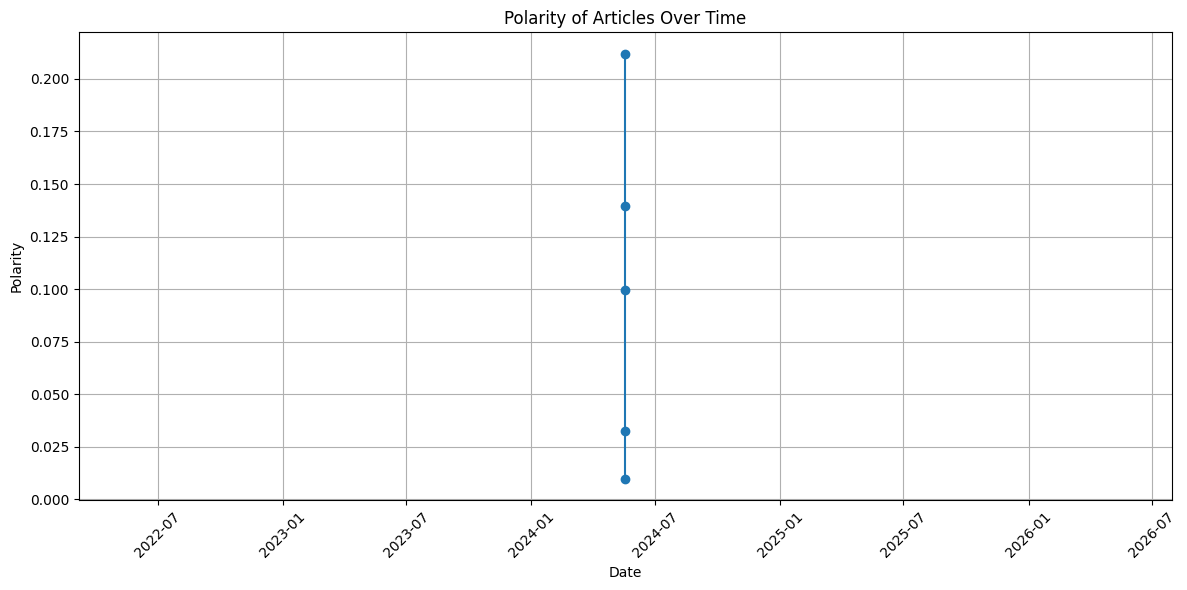

In [22]:
import matplotlib.pyplot as plt

# Assuming 'date' is a column in your DataFrame
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['polarity'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Polarity')
plt.title('Polarity of Articles Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Keyword Extraction

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample data
data = [
    "This is a sample document.",
    "Another example of a document.",
    "And another one for good measure."
]

# Create the TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Fit the vectorizer and transform the data
tfidf_matrix = tfidf.fit_transform(data)

# Get the feature names (words)
feature_names = tfidf.get_feature_names_out()

# Find the most important word in each document
for i in range(len(data)):
    doc = tfidf_matrix[i]
    word_idx = doc.indices[doc.data.argmax()]
    keyword = feature_names[word_idx]
    print(f"Keyword in document {i+1}: {keyword}")


Keyword in document 1: sample
Keyword in document 2: of
Keyword in document 3: measure


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample data
data = df['cleaned_article'].tolist()

# Create the TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Fit the vectorizer and transform the data
tfidf_matrix = tfidf.fit_transform(data)

# Get the feature names (words)
feature_names = tfidf.get_feature_names_out()
print(feature_names)

# Find the most important word in each document
keywords = []
for i in range(len(data)):
    doc = tfidf_matrix[i]
    word_idx = doc.indices[doc.data.argmax()]
    keyword = feature_names[word_idx]
    keywords.append(keyword)

# Add the keywords to the dataframe
df['keywords'] = keywords

# Print the keywords for each article
print(df[['cleaned_article', 'keywords']])

['ability' 'abojani' 'abounds' ... 'yet' 'youre' 'youve']
                                      cleaned_article  keywords
0   hustler government wish inform kenyan received...     child
1   need know allocation state department agricult...   billion
12  need know business plan cover key aspect locat...  business
17  need know m karua told president ruto respect ...        mr
21  meshack senge coach kenya hockey union woman p...       app


## Topic Modelling

In [72]:
from gensim import corpora, models
import gensim

# Sample data
data = df['cleaned_article'].tolist()

# Tokenize the data
tokenized_data = [article.split() for article in data]
print(f"tokenized data : {tokenized_data}")

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(tokenized_data)
print(f"Dictionary : {dictionary}")

# Filter out words that occur less than 20 documents, or more than 50% of the documents
dictionary.filter_extremes(no_below=3, no_above=0.8)
print(f"Filtered dictionary : {dictionary}")

# Convert the documents into a bag-of-words corpus
corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_data]
print(f"Dictionary.doc2bow([0]): {dictionary.doc2bow(tokenized_data[0])}")
print(f"Corpus : {corpus}")

# Train the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                             id2word=dictionary,
                                             num_topics=5,
                                             random_state=42,
                                             update_every=1,
                                             chunksize=100,
                                             passes=10,
                                             alpha='auto',
                                             per_word_topics=True)

# Print the topics
print(len(lda_model.print_topics(-1)))
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}\n')

# Assign the topics to the documents
# Extract topics from the LDA model
topic_results = lda_model[corpus]

# Extract the dominant topic for each article
print("Topic 1", topic_results[0][0], max(topic_results[0][0],key=lambda x: x[1]))
print("Topic 2", topic_results[1][0], max(topic_results[1][0],key=lambda x: x[1]))
print("Topic 3", topic_results[2][0], max(topic_results[2][0],key=lambda x: x[1]))
print("Topic 4", topic_results[3][0], max(topic_results[3][0],key=lambda x: x[1]))
print("Topic 5", topic_results[4][0], max(topic_results[4][0],key=lambda x: x[1]))
print([max(topic[0],key=lambda x: x[1]) for topic in topic_results])
dominant_topics = [max(topic[0],key=lambda x: x[1]) for topic in topic_results]

# Add the dominant topics to the dataframe
df['dominant_topic'] = [dictionary.id2token[topic[0]] for topic in dominant_topics]
df['topic_probability'] = [topic[1] for topic in dominant_topics]

# Print the dominant topic and its probability for each article
for index, row in df.iterrows():
    print(f"Article {index + 1} - Dominant Topic: {row['dominant_topic']}, Probability: {row['topic_probability']}")


tokenized data : [['hustler', 'government', 'wish', 'inform', 'kenyan', 'received', 'numerous', 'complaint', 'concerned', 'parent', 'omission', 'school', 'feeding', 'programme', 'budget', 'proposal', 'sent', 'parliament', 'debate', 'powered', 'wheelbarrow', 'economic', 'transformation', 'agenda', 'would', 'ordinarily', 'wished', 'continue', 'silence', 'matter', 'allow', 'kenya', 'kwanza', 'mp', 'use', 'independent', 'brain', 'however', 'growing', 'discontent', 'forced', 'u', 'come', 'want', 'allay', 'fear', 'kenyan', 'public', 'threatening', 'u', 'bad', 'thing', 'reinstate', 'allocation', 'time', 'june', 'budget', 'reading', 'second', 'return', 'jesus', 'whichever', 'come', 'first', 'aware', 'school', 'feeding', 'programme', 'play', 'critical', 'role', 'arid', 'semiarid', 'county', 'learner', 'retained', 'school', 'availability', 'hot', 'meal', 'constrained', 'continue', 'pressing', 'need', 'require', 'urgent', 'allocation', 'national', 'resource', 'ultramodern', 'pavilion', 'state', '

## Export Analyzed Data

In [ ]:
df.to_csv("dataset-analyzed.csv", index=False, mode='a', header=not os.path.exists("dataset-analyzed.csv"))